In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

# Replace 'path/to/your/zipfile.zip' with the actual path to your zip file in Google Drive
path = '/content/drive/MyDrive/DeepLearning/archive (1).zip'

!unzip '/content/drive/MyDrive/DeepLearning/archive (1).zip' -d '/content/drive/MyDrive/DeepLearning/BrainTumor'


Archive:  /content/drive/MyDrive/DeepLearning/archive (1).zip
  inflating: /content/drive/MyDrive/DeepLearning/BrainTumor/Testing/glioma_tumor/image(1).jpg  
  inflating: /content/drive/MyDrive/DeepLearning/BrainTumor/Testing/glioma_tumor/image(10).jpg  
  inflating: /content/drive/MyDrive/DeepLearning/BrainTumor/Testing/glioma_tumor/image(100).jpg  
  inflating: /content/drive/MyDrive/DeepLearning/BrainTumor/Testing/glioma_tumor/image(11).jpg  
  inflating: /content/drive/MyDrive/DeepLearning/BrainTumor/Testing/glioma_tumor/image(12).jpg  
  inflating: /content/drive/MyDrive/DeepLearning/BrainTumor/Testing/glioma_tumor/image(13).jpg  
  inflating: /content/drive/MyDrive/DeepLearning/BrainTumor/Testing/glioma_tumor/image(14).jpg  
  inflating: /content/drive/MyDrive/DeepLearning/BrainTumor/Testing/glioma_tumor/image(15).jpg  
  inflating: /content/drive/MyDrive/DeepLearning/BrainTumor/Testing/glioma_tumor/image(16).jpg  
  inflating: /content/drive/MyDrive/DeepLearning/BrainTumor/Testi

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# load and Define your training data directory
data_dir = '/content/drive/MyDrive/DeepLearning/BrainTumor/Training'


# Create an ImageDataGenerator instance for training data
train_datagen = ImageDataGenerator(rescale=1./255,  # You can add more preprocessing options here
                             shear_range=0.2,
                             zoom_range=0.2,
                             rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True,
                             vertical_flip=True)

# Use flow_from_directory to load the images for training
# Specify the target size, batch size, and class mode
train_generator = train_datagen.flow_from_directory(data_dir,
                                        target_size=(224, 224),  # adjust to your image size
                                        batch_size=32,
                                        class_mode='categorical',
                                        subset='training',
                                        classes=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor'])


Found 2870 images belonging to 4 classes.


In [4]:
test_data_dir = '/content/drive/MyDrive/DeepLearning/BrainTumor/Testing'

test_datagen= ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_data_dir,
                                        target_size=(224, 224),  # adjust to your image size
                                        batch_size=32,
                                        class_mode='categorical',
                                        classes=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor'])

Found 394 images belonging to 4 classes.


Training Image Shape: (224, 224, 3)
Testing Image Shape: (224, 224, 3)


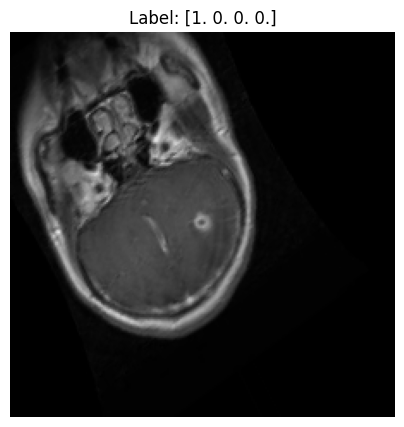

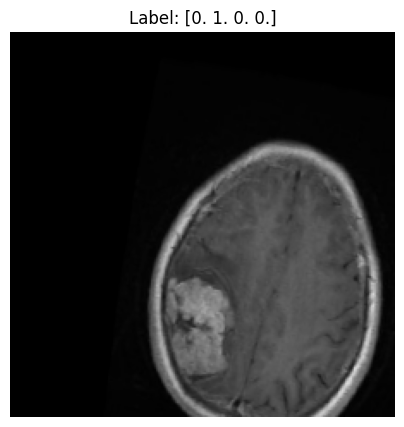

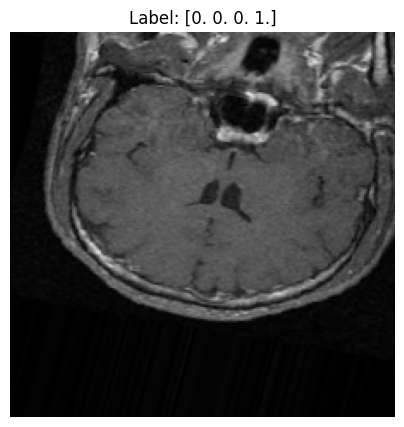

In [5]:
import matplotlib.pyplot as plt

# Get the shapes of training and testing images
print("Training Image Shape:", train_generator.image_shape)
print("Testing Image Shape:", test_generator.image_shape)

# Display some training images
for _ in range(3):  # Display 3 images
    img, label = next(train_generator)
    plt.figure(figsize=(5, 5))
    plt.imshow(img[0])  # Display the first image in the batch
    plt.title(f"Label: {label[0]}")
    plt.axis('off')
    plt.show()

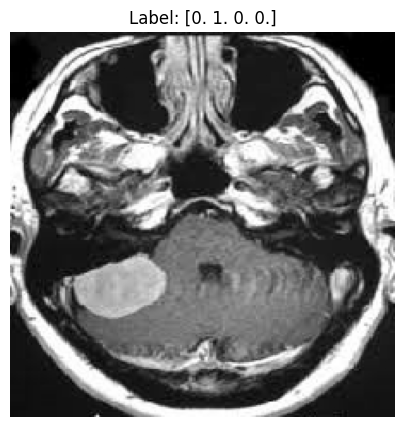

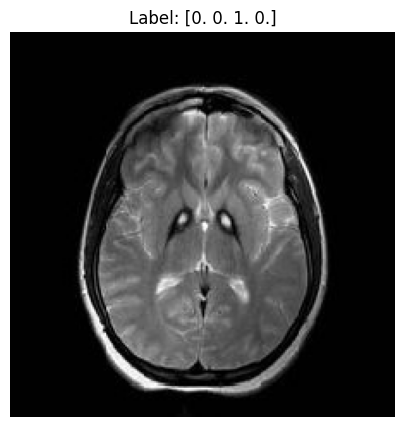

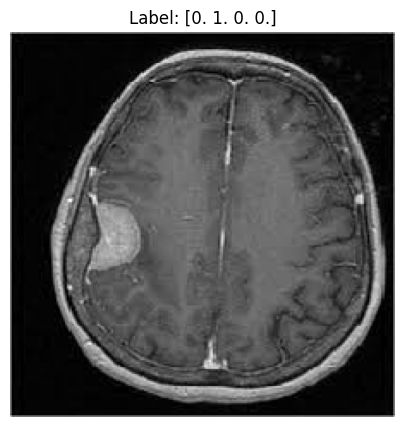

In [6]:
# Display some testing images
for _ in range(3):  # Display 3 images
    img, label = next(test_generator)
    plt.figure(figsize=(5, 5))
    plt.imshow(img[0])  # Display the first image in the batch
    plt.title(f"Label: {label[0]}")
    plt.axis('off')
    plt.show()

In [7]:
import matplotlib.pyplot as plt

# Function to display images with labels from the test generator
def show_images_with_labels(generator, num_images=3):
    for _ in range(num_images):
        img, label = next(generator)
        plt.figure(figsize=(5, 5))
        plt.imshow(img[0])
        class_index = np.argmax(label[0])  # Get the index of the class with highest probability
        if class_index == 0:
            class_label = "glioma_tumor"
        elif class_index == 1:
            class_label = "meningioma_tumor"
        elif class_index == 2:
            class_label = "no_tumor"  # This is what we want to visually compare
        else:  # Assuming index 3 corresponds to 'pituitary_tumor'
            class_label = "pituitary_tumor"

        plt.title(f"Label: {class_label}") # Display the correct label
        plt.axis('off')
        plt.show()

Examples of 'no_tumor' images (if present in the test set):


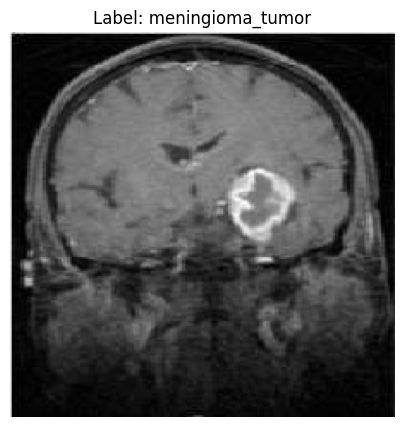

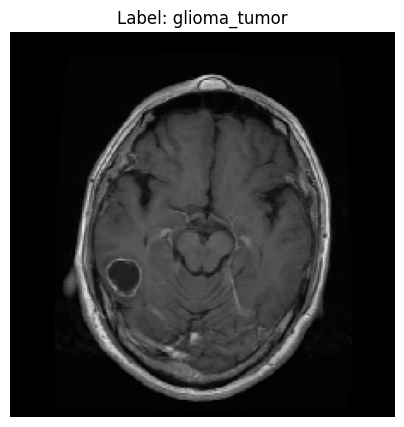

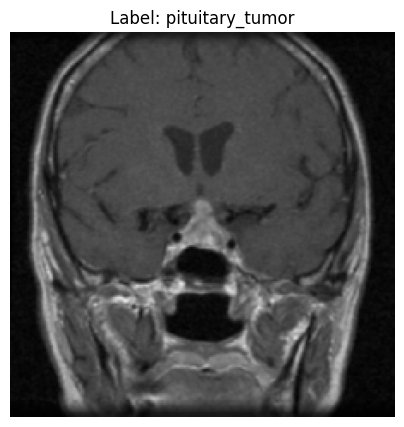

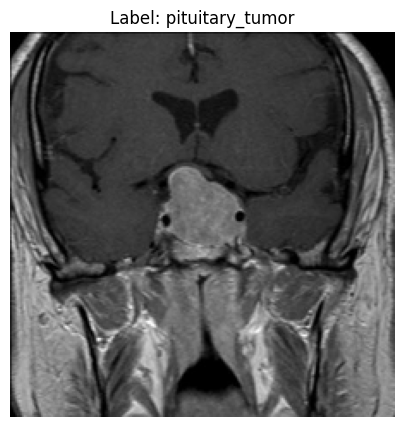

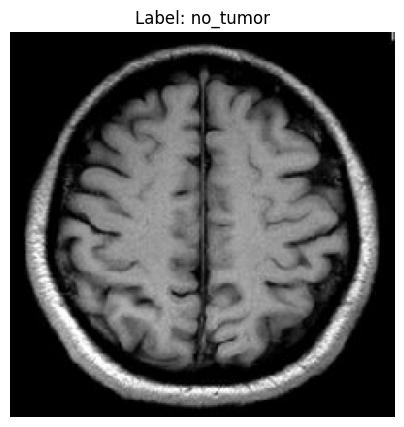

In [8]:
print("Examples of 'no_tumor' images (if present in the test set):")
show_images_with_labels(test_generator, num_images=5) # Show 5 images


Examples of Tumor Images:


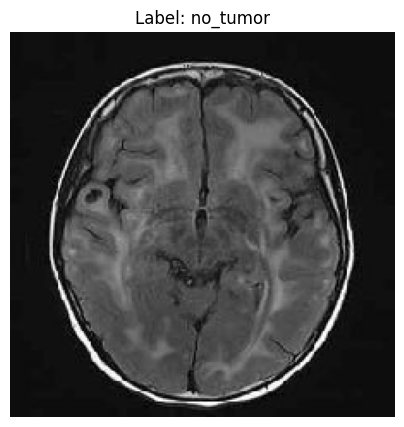

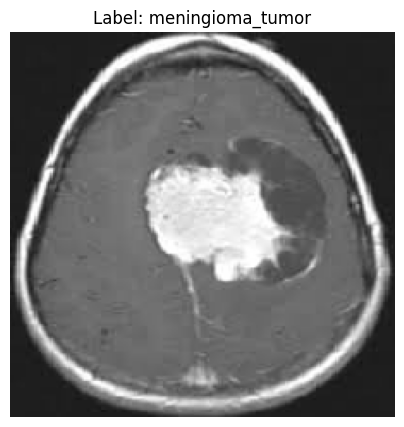

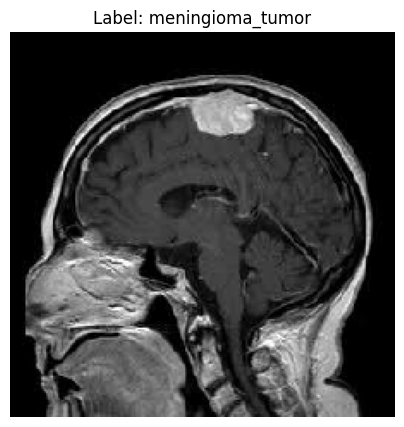

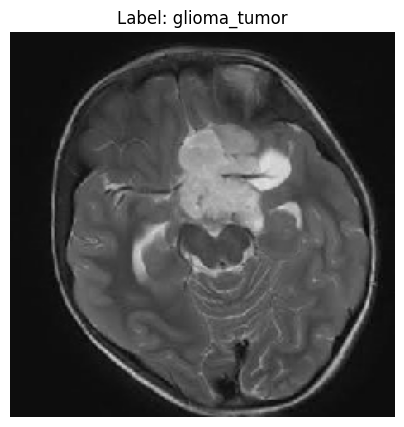

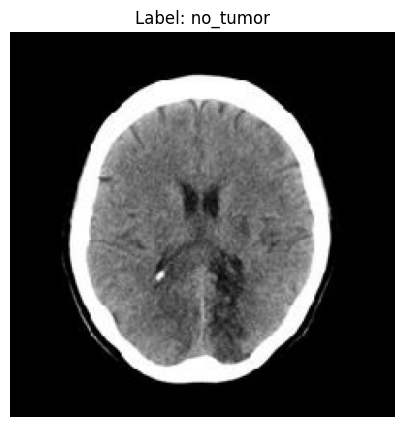

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Show examples of tumor images
print("Examples of Tumor Images:")
show_images_with_labels(test_generator, num_images=5) # Show 5 images

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Add dropout for regularization
model.add(Dense(4, activation='softmax')) # Output layer with 4 classes

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(
    train_generator,
    epochs=20,  # Adjust the number of epochs
    validation_data=test_generator
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


90/90 ━━━━━━━━━━━━━━━━━━━━ 710s 7s/step - accuracy: 0.3190 - loss: 1.5386 - val_accuracy: 0.1904 - val_loss: 1.6583
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 47s 491ms/step - accuracy: 0.4118 - loss: 1.2393 - val_accuracy: 0.1497 - val_loss: 1.7973
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 47s 492ms/step - accuracy: 0.4670 - loss: 1.1621 - val_accuracy: 0.1954 - val_loss: 2.0095
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 49s 492ms/step - accuracy: 0.4667 - loss: 1.1467 - val_accuracy: 0.2741 - val_loss: 2.4476
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 47s 494ms/step - accuracy: 0.5076 - loss: 1.0666 - val_accuracy: 0.2893 - val_loss: 2.7132
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 81s 489ms/step - accuracy: 0.5550 - loss: 1.0250 - val_accuracy: 0.3503 - val_loss: 2.5602
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 48s 484ms/step - accuracy: 0.5575 - loss: 1.0183 - val_accuracy: 0.3325 - val_loss: 3.5048
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 82s 497ms/step - accuracy: 0.5801 - loss: 0.9918 - val_accuracy: 0.3452 

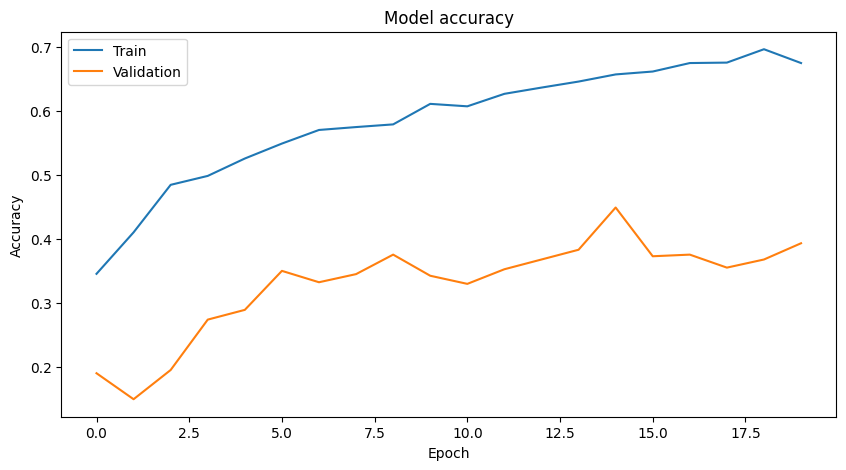

In [12]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

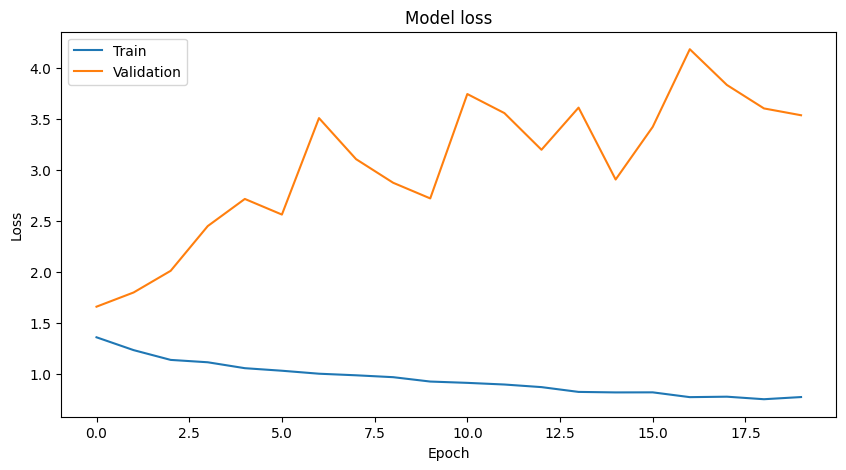

In [13]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [14]:
# Make predictions on the test set
predictions = model.predict(test_generator)

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 152ms/step


In [15]:
# Get predicted class labels
predicted_classes = np.argmax(predictions, axis=1)

In [16]:
# Get true class labels
true_classes = test_generator.classes

In [17]:
# Print the first few predictions and true labels for verification
print("First few predictions:", predicted_classes[:10])
print("First few true labels:", true_classes[:10])

First few predictions: [0 3 2 2 3 2 2 2 2 2]
First few true labels: [0 0 0 0 0 0 0 0 0 0]


                  precision    recall  f1-score   support

    glioma_tumor       0.23      0.05      0.08       100
meningioma_tumor       0.30      0.07      0.11       115
        no_tumor       0.27      0.79      0.40       105
 pituitary_tumor       0.12      0.07      0.09        74

        accuracy                           0.26       394
       macro avg       0.23      0.24      0.17       394
    weighted avg       0.24      0.26      0.18       394



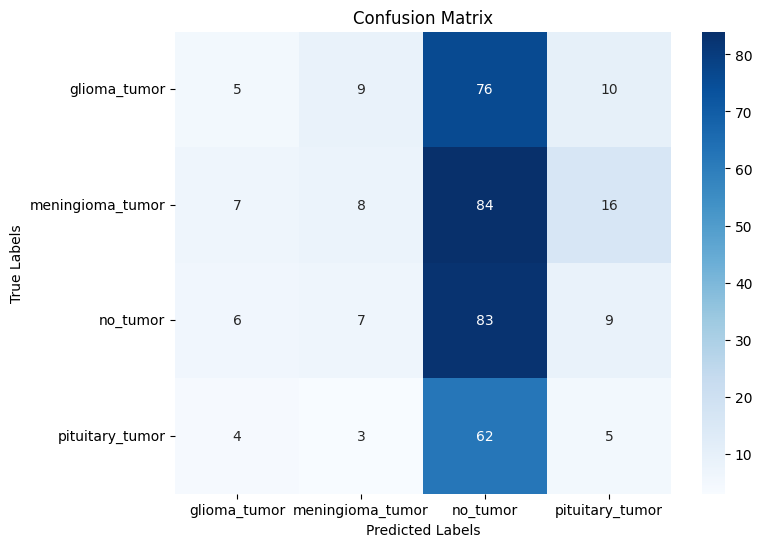

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Generate the classification report
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Generate and plot the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [19]:
model.save('/content/drive/MyDrive/DeepLearning/BrainTumor_model.h5')